#### Question 1 {Gradients}

In [1]:
import tensorflow as tf

In [2]:
def f(x):
  return tf.sin(x)

In [3]:
val = [0.0, 0.1, 0.2, 0.3]

for i in range(len(val)):

  x = tf.constant(val[i])
  print(x)
  with tf.GradientTape() as tape:
    tape.watch(x)
    y = f(x)

  dy_dx = tape.gradient(y, x)

  print("f(x) =", y.numpy())
  print("df/dx =", dy_dx.numpy())

tf.Tensor(0.0, shape=(), dtype=float32)
f(x) = 0.0
df/dx = 1.0
tf.Tensor(0.1, shape=(), dtype=float32)
f(x) = 0.09983342
df/dx = 0.9950042
tf.Tensor(0.2, shape=(), dtype=float32)
f(x) = 0.19866933
df/dx = 0.9800666
tf.Tensor(0.3, shape=(), dtype=float32)
f(x) = 0.29552022
df/dx = 0.9553365


#### Question 2 {The IMDB dataset}

###### _Model Config: Layer 1 Size -> 16, Layer 2 Size -> 8 | Optimizer -> AdamW (LR - 0.0005, epsilon = 1e - 09) | Dropout Layers -> 2 (0.5) | Number of Epochs -> 14_
Accuracy -> 88.50%

**Loading the IMDB dataset**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
# train_data[0]

In [6]:
# train_labels[0]

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
import tensorflow as tf
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.0005,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-09,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW",
)

In [14]:
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=14,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/14
30/30 [==============================] - 4s 92ms/step - loss: 0.6858 - accuracy: 0.5451 - val_loss: 0.6603 - val_accuracy: 0.6462
Epoch 2/14
30/30 [==============================] - 1s 39ms/step - loss: 0.6468 - accuracy: 0.6219 - val_loss: 0.5814 - val_accuracy: 0.8198
Epoch 3/14
30/30 [==============================] - 1s 36ms/step - loss: 0.5868 - accuracy: 0.6875 - val_loss: 0.5159 - val_accuracy: 0.8632
Epoch 4/14
30/30 [==============================] - 1s 37ms/step - loss: 0.5386 - accuracy: 0.7241 - val_loss: 0.4551 - val_accuracy: 0.8716
Epoch 5/14
30/30 [==============================] - 1s 37ms/step - loss: 0.4967 - accuracy: 0.7477 - val_loss: 0.4151 - val_accuracy: 0.8801
Epoch 6/14
30/30 [==============================] - 1s 35ms/step - loss: 0.4632 - accuracy: 0.7628 - val_loss: 0.3868 - val_accuracy: 0.8816
Epoch 7/14
30/30 [==============================] - 1s 49ms/step - loss: 0.4296 - accuracy: 0.7868 - val_loss: 0.3466 - val_accuracy: 0.8841
Epoch 8/14
30

In [17]:
# history_dict = history.history
# history_dict.keys()

**Plotting the training and validation loss**

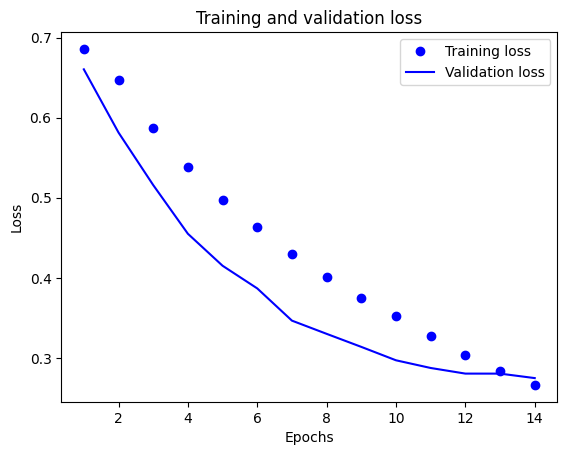

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

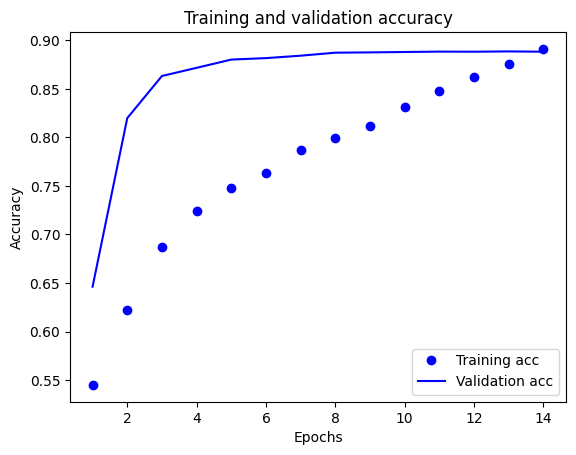

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
# predictions_test = model.predict(x_test)
# predictions_test[0]

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

782/782 [==============================] - 3s 4ms/step - loss: 0.2894 - accuracy: 0.8849
test_acc: 0.884880006313324


In [ ]:
# Trials

#1
'''
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

import tensorflow as tf
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="SGD",
)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
'''

#2
'''
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

optimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.0005,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-09,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW",
)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
'''

#3
'''
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),\
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

optimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-09,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW",
)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
'''

# Few other configurations

'''
1. Two dropout layers (0.5) -> {Accuracy}: 85 -> 86% ************ {BASE}
2. Two dropout layers (0.5) + Layer 1 (16) + Layer 2 (8)-> {Accuracy}: 86 -> 87.58%
3. Added optimizer Adam -> Result is same
4. Epoch -> 25 {Accuracy}: 87.58% -> 87.62%

## 14, 7 Adam, Dropout - 2 (0.5), epoch - 23

## *********16, 8 AdamW, Dropout - 2 (0.5), epoch - 10 -> 88% *****************

## 16, 8 AdamW (LR - 0.0005), Dropout - 2 (0.5), epoch - 10 -> 88.40%

## 16, 8,  4 AdamW (LR - 0.0005), Dropout - 2 (0.5. 0.25, 0.25), epoch - 20 -> 87. Xy

## ## 16, 8,  4, 2 AdamW (LR - 0.0005), Dropout - 2 (0.5. 0.25, 0.125, 0), epoch - 20 -> 87. Xy


## ## 16, 8 AdamW (LR - 0.0005, epsilon = 1e - 09), Dropout - 2 (0.5), epoch - 15 -> 88.30%

## ## 16, 8 AdamW (LR - 0.0005, epsilon = 1e - 09), Dropout - 2 (0.5), epoch - 13 -> 88.20%

## ## 16, 8 AdamW (LR - 0.0005, epsilon = 1e - 09), Dropout - 2 (0.5), epoch - 14 -> 88.50%

'''